In [84]:
import pandas as pd
pd.set_option('display.max_rows', 1000)


url = 'https://fbref.com/en/comps/13/schedule/Ligue-1-Scores-and-Fixtures'

ligue_list = []


ligue_list.append(pd.read_html(url,index_col=False,flavor='lxml')[0])
ligue_list = pd.concat(ligue_list, axis=0, ignore_index=True)


ligue1_df = ligue_list[ligue_list['Wk'].notna()]

ligue1_df = ligue1_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})


ligue1_df['HomeScore'] = ligue1_df['Score'].str[0]
ligue1_df['AwayScore'] = ligue1_df['Score'].str[2]

ligue1_df = ligue1_df.drop(['Match Report','Notes'],axis=1)

#convert to date

ligue1_df['Date'] = pd.to_datetime(ligue1_df['Date'])

ligue1_df.sort_values(by='Date', inplace=True)

ligue1_df = ligue1_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [85]:
ligue1_df = ligue1_df.dropna()

In [86]:
ligue1_df = ligue1_df[['Date','Home','HomeScore','xGHome','AwayScore','xGAway','Away']].reset_index(drop=True)

In [87]:
ligue1_df

,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away
0,2022-08-05,Lyon,2,1.3,1,1.5,Ajaccio
1,2022-08-06,Strasbourg,1,0.8,2,2.8,Monaco
2,2022-08-06,Clermont Foot,0,0.3,5,3.5,Paris S-G
3,2022-08-07,Rennes,0,1.8,1,1.1,Lorient
4,2022-08-07,Montpellier,3,1.7,2,2.0,Troyes
5,2022-08-07,Lille,4,2.4,1,0.6,Auxerre
6,2022-08-07,Marseille,4,2.1,1,0.9,Reims
7,2022-08-07,Lens,3,2.5,2,1.2,Brest
8,2022-08-07,Toulouse,1,0.9,1,1.2,Nice
9,2022-08-07,Angers,0,1.5,0,1.5,Nantes


In [88]:
league_Mean_Home_xG = round((ligue1_df['xGHome'].mean()),2)
league_Mean_Away_xG = round((ligue1_df['xGAway'].mean()),2)

In [89]:
print(f"The mean home expected goals is:", league_Mean_Home_xG)

The mean home expected goals is: 1.48


In [90]:
print(f"The mean away expected goals is:", league_Mean_Away_xG)

The mean away expected goals is: 1.33


Calculate home/away xG offense ratings


In [91]:
home_team_xg_strength_offense = ligue1_df.groupby('Home').agg({'xGHome': 'sum', 'Home': ['count', 'first']})

home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames', 'Home']

home_team_xg_strength_offense['xGHome_offense_rating'] = (home_team_xg_strength_offense['xGHome'] / home_team_xg_strength_offense['TotalGames']) / Mean_Home_xG
home_team_xg_strength_offense = home_team_xg_strength_offense.reset_index(drop = True)
home_team_xg_strength_offense = pd.DataFrame(home_team_xg_strength_offense)
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames','Home','xGHome_offense_rating']
home_team_xg_strength_offense = home_team_xg_strength_offense[['Home','xGHome','TotalGames','xGHome_offense_rating']]
home_team_xg_strength_offense.sort_values('xGHome_offense_rating', ascending=False)                              

,Home,xGHome,TotalGames,xGHome_offense_rating
14,Paris S-G,23.0,11,1.412776
6,Lille,21.5,11,1.320639
5,Lens,21.2,11,1.302211
15,Reims,18.9,10,1.277027
9,Marseille,22.5,12,1.266892
10,Monaco,19.6,11,1.203931
8,Lyon,19.2,11,1.179361
16,Rennes,18.4,12,1.036036
18,Toulouse,16.5,11,1.013514
13,Nice,14.8,10,1.000000


the larger the number in the offense rating the better the attack


In [92]:
away_team_xg_strength_offense = ligue1_df.groupby('Away').agg({'xGAway': 'sum', 'Away': ['count', 'first']})
away_team_xg_strength_offense.columns = ['xGAway', 'TotalGames', 'Away']
away_team_xg_strength_offense['xGAway_offense_rating'] = (away_team_xg_strength_offense['xGAway'] / away_team_xg_strength_offense['TotalGames']) / league_Mean_Away_xG
away_team_xg_strength_offense = away_team_xg_strength_offense.reset_index(drop = True)
away_team_xg_strength_offense = pd.DataFrame(away_team_xg_strength_offense)
away_team_xg_strength_offense.columns = ['xGAway', 'TotalGames','Away','xGAway_offense_rating']
away_team_xg_strength_offense = away_team_xg_strength_offense[['Away','xGAway','TotalGames','xGAway_offense_rating']]
away_team_xg_strength_offense.sort_values('xGAway_offense_rating', ascending=False)                         

,Away,xGAway,TotalGames,xGAway_offense_rating
14,Paris S-G,26.3,11,1.797676
16,Rennes,17.2,10,1.293233
5,Lens,18.9,11,1.291866
6,Lille,18.4,11,1.257690
10,Monaco,17.5,11,1.196172
9,Marseille,15.4,10,1.157895
8,Lyon,16.4,11,1.120984
19,Troyes,15.2,11,1.038961
15,Reims,15.7,12,0.983709
13,Nice,15.6,12,0.977444


Defense ratings - this is the inverse so the defense rating is based on away league averages

In [93]:
home_team_xg_strength_defence = ligue1_df.groupby('Home').agg({'xGAway': 'sum', 'Home': ['count', 'first']})

home_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames', 'Home']

home_team_xg_strength_defence['xG_home_defense_rating'] = (home_team_xg_strength_defence['xG_Conceded'] / home_team_xg_strength_defence['TotalGames']) / league_Mean_Away_xG

home_team_xg_strength_defence = home_team_xg_strength_defence.reset_index(drop = True)
home_team_xg_strength_defence = pd.DataFrame(home_team_xg_strength_defence)

home_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames','Home','xG_home_defense_rating']

home_team_xg_strength_defence = home_team_xg_strength_defence[['Home','xG_Conceded','TotalGames','xG_home_defense_rating']]
home_team_xg_strength_defence.sort_values('xG_home_defense_rating', ascending=True)    


,Home,xG_Conceded,TotalGames,xG_home_defense_rating
5,Lens,9.7,11,0.663021
16,Rennes,10.9,12,0.682957
9,Marseille,12.6,12,0.789474
8,Lyon,12.3,11,0.840738
13,Nice,11.3,10,0.849624
14,Paris S-G,12.7,11,0.868079
6,Lille,13.3,11,0.909091
15,Reims,12.2,10,0.917293
2,Auxerre,14.2,11,0.970608
12,Nantes,13.1,10,0.984962


In [94]:
away_team_xg_strength_defence = ligue1_df.groupby('Away').agg({'xGHome': 'sum', 'Home': ['count', 'first']})

away_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames', 'Home']

away_team_xg_strength_defence['xG_away_defense_rating'] = (away_team_xg_strength_defence['xG_Conceded'] / away_team_xg_strength_defence['TotalGames']) / league_Mean_Home_xG

away_team_xg_strength_defence = away_team_xg_strength_defence.reset_index(drop = True)
away_team_xg_strength_defence = pd.DataFrame(away_team_xg_strength_defence)

away_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames','Away','xG_away_defense_rating']

away_team_xg_strength_defence = away_team_xg_strength_defence[['Away','xG_Conceded','TotalGames','xG_away_defense_rating']]
away_team_xg_strength_defence.sort_values('xG_away_defense_rating', ascending=True)  

,Away,xG_Conceded,TotalGames,xG_away_defense_rating
14,Clermont Foot,10.2,11,0.626536
6,Nantes,12.4,11,0.761671
13,Toulouse,14.3,12,0.805180
12,Angers,14.5,12,0.816441
10,Strasbourg,13.3,11,0.816953
9,Brest,13.2,10,0.891892
8,Reims,14.6,11,0.896806
0,Lyon,14.8,11,0.909091
5,Ajaccio,15.0,11,0.921376
1,Auxerre,15.8,11,0.970516


Now we are in a position to calculate the total expected goals per team in a match - lets try predict the game on Sunday 12th february between LYON - LENS. 

WE Need to first multiple lyons home offense rating by lens away defense rating by the league mean xg scored by home teams

In [95]:
lyon_home_offense_rating = 1.179361
lens_away_defense_rating = 1.105651

lyon_home_expected_xg = (lyon_home_offense_rating * lens_away_defense_rating) * league_Mean_Home_xG
lyon_home_expected_xg

1.9298632701362801

In [96]:
lens_away_offense_rating = 1.291866
lyon_home_defense_rating = 0.840738

lens_away_expected_xg = (lens_away_offense_rating * lyon_home_defense_rating) * league_Mean_Away_xG

lens_away_expected_xg

1.44454071335364

According to the league stats to date we expect lyon to record 1.9298 xg and lens 1.4445 xg

<h2> Use the poisson distribution to calculate the probabilities of all score lines up to 7 goals 
    

In [ ]:
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

home_expectancy = lyon_home_expected_xg
away_expectancy = lens_away_expected_xg


max_score = 7
score_range = np.arange(0, max_score+1)

max_score = 7
score_range = np.arange(0, max_score+1)

home_pmf = poisson.pmf(score_range, home_expectancy)
away_pmf = poisson.pmf(score_range, away_expectancy)

# calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf, away_pmf)

# reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)


# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# create a heatmap using seaborn
sns.set()
sns.heatmap(score_prob_matrix, cmap="coolwarm", annot=True, fmt=".4f", square=True, cbar_kws={"shrink": 0.7}, ax=ax)

# set the axis labels and title
plt.xlabel("Away goals")
plt.ylabel("Home goals")
plt.title("Score probability matrix")

# display the plot
plt.show()


In [ ]:
# calculate the sums of home wins, draws, and away wins
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# create a table to display the sums
table_data = {
    "Home wins": [home_wins],
    "Draws": [draws],
    "Away wins": [away_wins]
}
table = pd.DataFrame(table_data)

# display the table
print(table)

In [3]:
ligue1_df = ligue1_df[['Date','Home','HomeScore','xGHome','AwayScore','xGAway','Away']].reset_index(drop=True)

In [4]:
ligue1_df

,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away
0,2022-08-05,Lyon,2,1.3,1,1.5,Ajaccio
1,2022-08-06,Strasbourg,1,0.8,2,2.8,Monaco
2,2022-08-06,Clermont Foot,0,0.3,5,3.5,Paris S-G
3,2022-08-07,Rennes,0,1.8,1,1.1,Lorient
4,2022-08-07,Montpellier,3,1.7,2,2.0,Troyes
5,2022-08-07,Lille,4,2.4,1,0.6,Auxerre
6,2022-08-07,Marseille,4,2.1,1,0.9,Reims
7,2022-08-07,Lens,3,2.5,2,1.2,Brest
8,2022-08-07,Toulouse,1,0.9,1,1.2,Nice
9,2022-08-07,Angers,0,1.5,0,1.5,Nantes


In [50]:
league_Mean_Home_xG = round((ligue1_df['xGHome'].mean()),2)
league_Mean_Away_xG = round((ligue1_df['xGAway'].mean()),2)

In [51]:
print(f"The mean home expected goals is:", league_Mean_Home_xG)

The mean home expected goals is: 1.48


In [52]:
print(f"The mean away expected goals is:", league_Mean_Away_xG)

The mean away expected goals is: 1.33


Calculate home/away xG offense ratings


In [54]:
home_team_xg_strength_offense = ligue1_df.groupby('Home').agg({'xGHome': 'sum', 'Home': ['count', 'first']})

home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames', 'Home']

home_team_xg_strength_offense['xGHome_offense_rating'] = (home_team_xg_strength_offense['xGHome'] / home_team_xg_strength_offense['TotalGames']) / Mean_Home_xG
home_team_xg_strength_offense = home_team_xg_strength_offense.reset_index(drop = True)
home_team_xg_strength_offense = pd.DataFrame(home_team_xg_strength_offense)
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames','Home','xGHome_offense_rating']
home_team_xg_strength_offense = home_team_xg_strength_offense[['Home','xGHome','TotalGames','xGHome_offense_rating']]
home_team_xg_strength_offense.sort_values('xGHome_offense_rating', ascending=False)                              

,Home,xGHome,TotalGames,xGHome_offense_rating
14,Paris S-G,23.0,11,1.412776
6,Lille,21.5,11,1.320639
5,Lens,21.2,11,1.302211
15,Reims,18.9,10,1.277027
9,Marseille,22.5,12,1.266892
10,Monaco,19.6,11,1.203931
8,Lyon,19.2,11,1.179361
16,Rennes,18.4,12,1.036036
18,Toulouse,16.5,11,1.013514
13,Nice,14.8,10,1.000000


the larger the number in the offense rating the better the attack


In [56]:
away_team_xg_strength_offense = ligue1_df.groupby('Away').agg({'xGAway': 'sum', 'Away': ['count', 'first']})
away_team_xg_strength_offense.columns = ['xGAway', 'TotalGames', 'Away']
away_team_xg_strength_offense['xGAway_offense_rating'] = (away_team_xg_strength_offense['xGAway'] / away_team_xg_strength_offense['TotalGames']) / league_Mean_Away_xG
away_team_xg_strength_offense = away_team_xg_strength_offense.reset_index(drop = True)
away_team_xg_strength_offense = pd.DataFrame(away_team_xg_strength_offense)
away_team_xg_strength_offense.columns = ['xGAway', 'TotalGames','Away','xGAway_offense_rating']
away_team_xg_strength_offense = away_team_xg_strength_offense[['Away','xGAway','TotalGames','xGAway_offense_rating']]
away_team_xg_strength_offense.sort_values('xGAway_offense_rating', ascending=False)                         

,Away,xGAway,TotalGames,xGAway_offense_rating
14,Paris S-G,26.3,11,1.797676
16,Rennes,17.2,10,1.293233
5,Lens,18.9,11,1.291866
6,Lille,18.4,11,1.257690
10,Monaco,17.5,11,1.196172
9,Marseille,15.4,10,1.157895
8,Lyon,16.4,11,1.120984
19,Troyes,15.2,11,1.038961
15,Reims,15.7,12,0.983709
13,Nice,15.6,12,0.977444


Defense ratings - this is the inverse so the defense rating is based on away league averages

In [58]:
home_team_xg_strength_defence = ligue1_df.groupby('Home').agg({'xGAway': 'sum', 'Home': ['count', 'first']})

home_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames', 'Home']

home_team_xg_strength_defence['xG_home_defense_rating'] = (home_team_xg_strength_defence['xG_Conceded'] / home_team_xg_strength_defence['TotalGames']) / league_Mean_Away_xG

home_team_xg_strength_defence = home_team_xg_strength_defence.reset_index(drop = True)
home_team_xg_strength_defence = pd.DataFrame(home_team_xg_strength_defence)

home_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames','Home','xG_home_defense_rating']

home_team_xg_strength_defence = home_team_xg_strength_defence[['Home','xG_Conceded','TotalGames','xG_home_defense_rating']]
home_team_xg_strength_defence.sort_values('xG_home_defense_rating', ascending=True)    


,Home,xG_Conceded,TotalGames,xG_home_defense_rating
5,Lens,9.7,11,0.663021
16,Rennes,10.9,12,0.682957
9,Marseille,12.6,12,0.789474
8,Lyon,12.3,11,0.840738
13,Nice,11.3,10,0.849624
14,Paris S-G,12.7,11,0.868079
6,Lille,13.3,11,0.909091
15,Reims,12.2,10,0.917293
2,Auxerre,14.2,11,0.970608
12,Nantes,13.1,10,0.984962


In [59]:
away_team_xg_strength_defence = ligue1_df.groupby('Away').agg({'xGHome': 'sum', 'Home': ['count', 'first']})

away_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames', 'Home']

away_team_xg_strength_defence['xG_away_defense_rating'] = (away_team_xg_strength_defence['xG_Conceded'] / away_team_xg_strength_defence['TotalGames']) / league_Mean_Home_xG

away_team_xg_strength_defence = away_team_xg_strength_defence.reset_index(drop = True)
away_team_xg_strength_defence = pd.DataFrame(away_team_xg_strength_defence)

away_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames','Away','xG_away_defense_rating']

away_team_xg_strength_defence = away_team_xg_strength_defence[['Away','xG_Conceded','TotalGames','xG_away_defense_rating']]
away_team_xg_strength_defence.sort_values('xG_away_defense_rating', ascending=True)  

,Away,xG_Conceded,TotalGames,xG_away_defense_rating
14,Clermont Foot,10.2,11,0.626536
6,Nantes,12.4,11,0.761671
13,Toulouse,14.3,12,0.805180
12,Angers,14.5,12,0.816441
10,Strasbourg,13.3,11,0.816953
9,Brest,13.2,10,0.891892
8,Reims,14.6,11,0.896806
0,Lyon,14.8,11,0.909091
5,Ajaccio,15.0,11,0.921376
1,Auxerre,15.8,11,0.970516


Now we are in a position to calculate the total expected goals per team in a match - lets try predict the game on Sunday 12th february between LYON - LENS. 

WE Need to first multiple lyons home offense rating by lens away defense rating by the league mean xg scored by home teams

In [61]:
lyon_home_offense_rating = 1.179361
lens_away_defense_rating = 1.105651

lyon_home_expected_xg = (lyon_home_offense_rating * lens_away_defense_rating) * league_Mean_Home_xG
lyon_home_expected_xg

1.9298632701362801

In [63]:
lens_away_offense_rating = 1.291866
lyon_home_defense_rating = 0.840738

lens_away_expected_xg = (lens_away_offense_rating * lyon_home_defense_rating) * league_Mean_Away_xG

lens_away_expected_xg

1.44454071335364

According to the league stats to date we expect lyon to record 1.9298 xg and lens 1.4445 xg

<h2> Use the poisson distribution to calculate the probabilities of all score lines up to 10 goals 
    

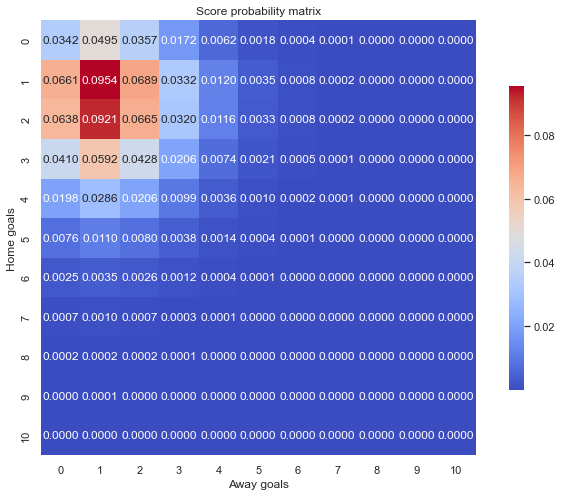

In [99]:
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

home_expectancy = lyon_home_expected_xg
away_expectancy = lens_away_expected_xg


max_score = 10
score_range = np.arange(0, max_score+1)

home_pmf = poisson.pmf(score_range, home_expectancy)
away_pmf = poisson.pmf(score_range, away_expectancy)

# calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf, away_pmf)

# reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)


# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# create a heatmap using seaborn
sns.set()
sns.heatmap(score_prob_matrix, cmap="coolwarm", annot=True, fmt=".4f", square=True, cbar_kws={"shrink": 0.7}, ax=ax)

# set the axis labels and title
plt.xlabel("Away goals")
plt.ylabel("Home goals")
plt.title("Score probability matrix")

# display the plot
plt.show()


In [101]:
# calculate the sums of home wins, draws, and away wins
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# create a table to display the sums
table_data = {
    "Home wins": [home_wins],
    "Draws": [draws],
    "Away wins": [away_wins]
}
table = pd.DataFrame(table_data)

# display the table
print(table)

   Home wins     Draws  Away wins
0   0.489932  0.220839   0.289223
